# Student dataset - Level 1

In [75]:
import pandas as pd

student_df = pd.read_csv("bi.csv", encoding="ISO-8859-1")
# Create the df for cleaned data
df = student_df.copy()

## Part 1 – Data Cleaning

### 1. Check dataset structure

### Use df.shape, df.info(), and df.head() to understand the number of rows, columns, and data types.

In [2]:
df.shape

(77, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [4]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


#### Which columns should be categorical and which should be numerical?

##### Categorical Columns: (fNAME, lNAME, gender, country, residence, prevEducation)
##### Numerical Columns: (Age, entryEXAM, studyHOURS, Python, DB)

### 2. Detect inconsistent categories

#### Run df['gender'].unique(), df['country'].unique(), and df['prevEducation'].unique().

In [5]:
print("Gender:", df['gender'].unique())

Gender: ['Female' 'M' 'Male' 'F' 'female' 'male']


###### Male & Female are repeated in different fotmats

In [6]:
print("Country:", df['country'].unique())

Country: ['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']


###### South Africa is written as Rsa, United Kingdom is written as UK, Norway is written as norway

In [7]:
print("Prev Education:", df['prevEducation'].unique())

Prev Education: ['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


###### Diploma, high school, and Bachelors formats are not correct

#### Find issues such as "Male" vs "M" or "Barrrchelors" vs "Bachelor" (Fix them using .replace() or string methods like .str.upper().strip().)

In [76]:
df['gender'] = df['gender'].replace({
    'M': 'Male', 'male': 'Male',
    'F': 'Female', 'female': 'Female'})
print("Gender:", df['gender'].unique())

Gender: ['Female' 'Male']


In [77]:
df['country'] = df['country'].replace({
    'Rsa': 'South Africa', 'UK': 'United Kingdom','norway': 'Norway'})
print("Country:", df['country'].unique())

Country: ['Norway' 'Kenya' 'Uganda' 'South Africa' 'Norge' 'Denmark' 'Netherlands'
 'Italy' 'Spain' 'United Kingdom' 'Somali' 'Nigeria' 'Germany' 'France']


In [78]:
df['prevEducation'] = df['prevEducation'].replace({
    'HighSchool': 'High School',
    'Barrrchelors': 'Bachelors',
    'diploma': 'Diploma',
    'DIPLOMA': 'Diploma',
    'Diplomaaa': 'Diploma'})
print("Prev Education:", df['prevEducation'].unique())

Prev Education: ['Masters' 'Diploma' 'High School' 'Bachelors' 'Doctorate']


### 3. Handle duplicates

#### Check for duplicates with df.duplicated().sum().

In [79]:
print("Duplicates found:", df.duplicated().sum())

Duplicates found: 0


#### Drop them using df.drop_duplicates().

In [12]:
# No need as there is no duplicates

## Part 2 – Missing Data

### 1. Identify missing values

#### Use df.isnull().sum() to see which columns have missing data.

In [80]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

#### Question: Which columns are most affected by missing values?

###### 'Python' is most affected column so far, but it could be more missing values/not correct.

### 2. Impute missing values

#### Option 1 (Numerical): Fill missing scores in Python or DB using mean or median.

In [81]:
# find the rows with missing data
df[df['Python'].isna()]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
33,Frank,Abrahamsen,23,Male,Norway,BI Residence,68,High School,152,NaN,70


In [82]:
# copy data frame into new 'df_mean' to see the result before real replacement
df_mean = df.copy()
df_mean['Python'] = df_mean['Python'].fillna(df_mean['Python'].mean())

In [83]:
print(df_mean.loc[[3, 33]])

    fNAME       lNAME  Age  gender       country     residence  entryEXAM  \
3   Shoni   Hlongwane   22  Female  South Africa     Sognsvann         40   
33  Frank  Abrahamsen   23    Male        Norway  BI Residence         68   

   prevEducation  studyHOURS     Python  DB  
3    High School         120  75.853333  44  
33   High School         152  75.853333  70  


In [84]:
# copy data frame into new 'df_median' to see the result before real replacement
df_median = df.copy()
df_median['Python'] = df_median['Python'].fillna(df_median['Python'].median())

In [85]:
print(df_median.loc[[3, 33]])

    fNAME       lNAME  Age  gender       country     residence  entryEXAM  \
3   Shoni   Hlongwane   22  Female  South Africa     Sognsvann         40   
33  Frank  Abrahamsen   23    Male        Norway  BI Residence         68   

   prevEducation  studyHOURS  Python  DB  
3    High School         120    81.0  44  
33   High School         152    81.0  70  


In [86]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [20]:
df['Python'].value_counts()

Python
87.0    10
80.0     9
84.0     8
85.0     7
81.0     5
90.0     3
69.0     3
70.0     2
75.0     2
88.0     2
78.0     2
57.0     2
60.0     2
59.0     1
91.0     1
33.0     1
76.0     1
79.0     1
83.0     1
74.0     1
82.0     1
66.0     1
30.0     1
31.0     1
61.0     1
86.0     1
48.0     1
45.0     1
15.0     1
63.0     1
72.0     1
Name: count, dtype: int64

##### Based on the previous data, I think that Median will be more accurate to be in the NaN values
###### 1. the scores between 25% and 75% are 71 and 85
###### 2. the outilers affected the mean values (15, 30, 31, 33 ..) which are repeated only once 

In [87]:
df['Python'] = df['Python'].fillna(df['Python'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


#### Option 2 (Categorical): Fill missing categories in country or gender with mode.

###### there is no other missing values found

## Part 3 – Outliers

### 1. Detect outliers

#### Use boxplots (sns.boxplot) or summary statistics (df['Python'].describe()).

In [22]:
df['studyHOURS'].describe()

count     77.000000
mean     149.714286
std       12.743272
min      114.000000
25%      144.000000
50%      156.000000
75%      158.000000
max      160.000000
Name: studyHOURS, dtype: float64

In [23]:
df['Python'].describe()

count    77.000000
mean     75.987013
std      15.228517
min      15.000000
25%      72.000000
50%      81.000000
75%      85.000000
max      91.000000
Name: Python, dtype: float64

In [24]:
df['DB'].describe() 

count     77.000000
mean      69.467532
std       17.033701
min       30.000000
25%       56.000000
50%       71.000000
75%       83.000000
max      100.000000
Name: DB, dtype: float64

In [25]:
df['DB'].value_counts() 

DB
90     6
50     5
74     4
55     4
82     3
83     3
60     3
59     2
61     2
67     2
46     2
91     2
99     2
77     2
78     2
58     2
88     2
73     2
45     2
86     2
62     2
70     2
89     2
75     1
80     1
44     1
79     1
69     1
30     1
76     1
56     1
65     1
33     1
92     1
42     1
47     1
100    1
68     1
71     1
43     1
Name: count, dtype: int64

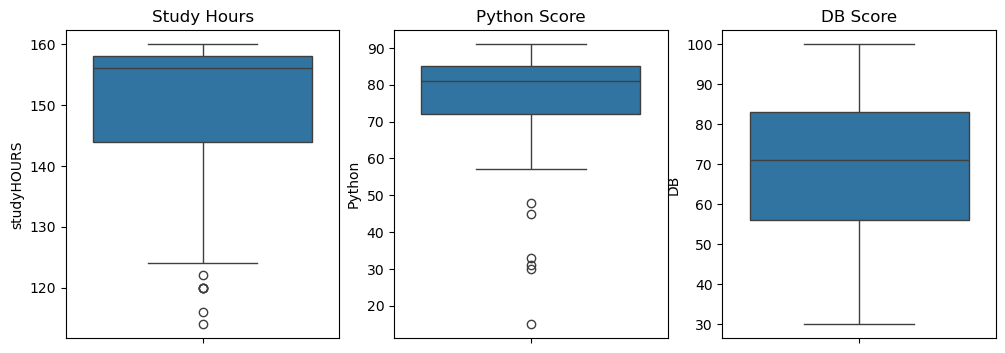

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(y=df['studyHOURS'])
plt.title("Study Hours")

plt.subplot(1,3,2)
sns.boxplot(y=df['Python'])
plt.title("Python Score")

plt.subplot(1,3,3)
sns.boxplot(y=df['DB'])
plt.title("DB Score")

plt.show()


#### 1. 'studyHOURS' minimum = 114.000000, maximum = 160.000000 which is making sense
##### - 160 hours/month, means almot 5 hours/day 
##### - My decision is to keep that coulmn as it is.

#### 2. 'Python' and 'DB' column is a student score from 0 to 100
##### - 'Python' has minimum score 15 repeated only once; I will drop that row as it is a very small value and there no values more than 100
##### - 'DB' has minmum score 30 repeated only once; low value but still realistic and there no values more than 100

In [88]:
df.drop(df[df['Python'] == 15].index, inplace=True)
df['Python'].unique()

array([59., 60., 74., 81., 91., 88., 80., 85., 83., 79., 70., 75., 87.,
       76., 84., 33., 30., 61., 82., 66., 31., 90., 69., 57., 86., 78.,
       48., 45., 63., 72.])

In [89]:
# check the final statistics
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,35.197368,77.394737,150.105263,76.789474,69.500000
std,10.410277,15.587242,12.354302,13.592464,17.144484
min,21.000000,30.000000,114.000000,30.000000,30.000000
25%,27.000000,69.750000,144.000000,73.500000,55.750000
50%,33.000000,80.500000,156.000000,81.000000,72.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          76 non-null     object 
 1   lNAME          76 non-null     object 
 2   Age            76 non-null     int64  
 3   gender         76 non-null     object 
 4   country        76 non-null     object 
 5   residence      76 non-null     object 
 6   entryEXAM      76 non-null     int64  
 7   prevEducation  76 non-null     object 
 8   studyHOURS     76 non-null     int64  
 9   Python         76 non-null     float64
 10  DB             76 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 7.1+ KB


In [90]:
# save the df into cleaned_students.csv file
df.to_csv("cleaned_students.csv", index=False)

# Student dataset - Level 2

## Part 4 – Feature Engineering

### Create a new feature

#### Programming Average = (Python + DB)/2.

In [91]:
df['Programming_Avg'] = (df['Python'] + df['DB']) / 2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fNAME            76 non-null     object 
 1   lNAME            76 non-null     object 
 2   Age              76 non-null     int64  
 3   gender           76 non-null     object 
 4   country          76 non-null     object 
 5   residence        76 non-null     object 
 6   entryEXAM        76 non-null     int64  
 7   prevEducation    76 non-null     object 
 8   studyHOURS       76 non-null     int64  
 9   Python           76 non-null     float64
 10  DB               76 non-null     int64  
 11  Programming_Avg  76 non-null     float64
dtypes: float64(2), int64(4), object(6)
memory usage: 7.7+ KB


#### binary feature: isAdult = 1 if Age >= 25, else 0.

In [92]:
isAdult_list = []
for age in df['Age']:
    if age >= 25:
        isAdult_list.append(1)
    else:
        isAdult_list.append(0)

df['isAdult'] = isAdult_list
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fNAME            76 non-null     object 
 1   lNAME            76 non-null     object 
 2   Age              76 non-null     int64  
 3   gender           76 non-null     object 
 4   country          76 non-null     object 
 5   residence        76 non-null     object 
 6   entryEXAM        76 non-null     int64  
 7   prevEducation    76 non-null     object 
 8   studyHOURS       76 non-null     int64  
 9   Python           76 non-null     float64
 10  DB               76 non-null     int64  
 11  Programming_Avg  76 non-null     float64
 12  isAdult          76 non-null     int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 8.3+ KB


### Transform studyHOURS into categories (Low / Medium / High).

In [93]:
studyHOURS_cat = []
for sh in df['studyHOURS']:
    if sh < 120:
        studyHOURS_cat.append('Low')
    elif 120 <= sh < 150:
        studyHOURS_cat.append('Medium')
    else:
        studyHOURS_cat.append('High')

df['studyHOURS_cat'] = studyHOURS_cat
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fNAME            76 non-null     object 
 1   lNAME            76 non-null     object 
 2   Age              76 non-null     int64  
 3   gender           76 non-null     object 
 4   country          76 non-null     object 
 5   residence        76 non-null     object 
 6   entryEXAM        76 non-null     int64  
 7   prevEducation    76 non-null     object 
 8   studyHOURS       76 non-null     int64  
 9   Python           76 non-null     float64
 10  DB               76 non-null     int64  
 11  Programming_Avg  76 non-null     float64
 12  isAdult          76 non-null     int64  
 13  studyHOURS_cat   76 non-null     object 
dtypes: float64(2), int64(5), object(7)
memory usage: 8.9+ KB


In [94]:
df['studyHOURS_cat']

0       High
1       High
2     Medium
3     Medium
4     Medium
       ...  
72      High
73      High
74      High
75      High
76    Medium
Name: studyHOURS_cat, Length: 76, dtype: object

In [95]:
df['Programming_Avg'].corr(df['studyHOURS'])

np.float64(0.6989272561554796)

### Study Efficiency

In [96]:
df['Efficiency'] = df['Programming_Avg'] / df['studyHOURS']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fNAME            76 non-null     object 
 1   lNAME            76 non-null     object 
 2   Age              76 non-null     int64  
 3   gender           76 non-null     object 
 4   country          76 non-null     object 
 5   residence        76 non-null     object 
 6   entryEXAM        76 non-null     int64  
 7   prevEducation    76 non-null     object 
 8   studyHOURS       76 non-null     int64  
 9   Python           76 non-null     float64
 10  DB               76 non-null     int64  
 11  Programming_Avg  76 non-null     float64
 12  isAdult          76 non-null     int64  
 13  studyHOURS_cat   76 non-null     object 
 14  Efficiency       76 non-null     float64
dtypes: float64(3), int64(5), object(7)
memory usage: 9.5+ KB


### Track Performance

In [97]:
df['Track_Performance'] = df['Programming_Avg'] - df['entryEXAM']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fNAME              76 non-null     object 
 1   lNAME              76 non-null     object 
 2   Age                76 non-null     int64  
 3   gender             76 non-null     object 
 4   country            76 non-null     object 
 5   residence          76 non-null     object 
 6   entryEXAM          76 non-null     int64  
 7   prevEducation      76 non-null     object 
 8   studyHOURS         76 non-null     int64  
 9   Python             76 non-null     float64
 10  DB                 76 non-null     int64  
 11  Programming_Avg    76 non-null     float64
 12  isAdult            76 non-null     int64  
 13  studyHOURS_cat     76 non-null     object 
 14  Efficiency         76 non-null     float64
 15  Track_Performance  76 non-null     float64
dtypes: float64(4), int64(5), object(7

### Question: Which engineered feature do you think would add the most predictive power to the model?

#### Programming_Avg: represented the whole goal of the data (pass/fail) 
#### Efficiency: scores vs study hours (how much the student get out from his/her effort)
#### Track Performance: Entry Exam vs scores after studing (improvement over time)

## Part 5 – Feature Scaling

### Detect Numeric Columns

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fNAME              76 non-null     object 
 1   lNAME              76 non-null     object 
 2   Age                76 non-null     int64  
 3   gender             76 non-null     object 
 4   country            76 non-null     object 
 5   residence          76 non-null     object 
 6   entryEXAM          76 non-null     int64  
 7   prevEducation      76 non-null     object 
 8   studyHOURS         76 non-null     int64  
 9   Python             76 non-null     float64
 10  DB                 76 non-null     int64  
 11  Programming_Avg    76 non-null     float64
 12  isAdult            76 non-null     int64  
 13  studyHOURS_cat     76 non-null     object 
 14  Efficiency         76 non-null     float64
 15  Track_Performance  76 non-null     float64
dtypes: float64(4), int64(5), object(7

In [60]:
numeric = ['Age', 'entryEXAM', 'studyHOURS', 'Python', 'DB', 'Programming_Avg', 'Efficiency', 'Track_Performance']

### Apply Scaling

#### Option 1: StandardScaler (mean=0, std=1) → good for SVM, Logistic Regression.

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard = df.copy()
scaler.fit(df[numeric])
df_standard[numeric] = scaler.transform(df[numeric])
df_standard[numeric].describe()

,Age,entryEXAM,studyHOURS,Python,DB,Programming_Avg,Efficiency,Track_Performance
count,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01
mean,1.431603e-16,1.869849e-16,-2.410353e-16,4.258290e-16,-8.764919e-18,2.351920e-16,1.013809e-15,-2.337312e-17
std,1.006645e+00,1.006645e+00,1.006645e+00,1.006645e+00,1.006645e+00,1.006645e+00,1.006645e+00,1.006645e+00
min,-1.372846e+00,-3.060814e+00,-2.941904e+00,-3.465183e+00,-2.319257e+00,-3.160917e+00,-3.008911e+00,-1.703509e+00
25%,-7.926626e-01,-4.937072e-01,-4.974648e-01,-2.436152e-01,-8.073362e-01,-5.897383e-01,-6.590175e-01,-6.356377e-01
50%,-2.124794e-01,2.005420e-01,4.803108e-01,3.118275e-01,1.467884e-01,1.218426e-01,1.844209e-01,-2.288296e-01
75%,6.577954e-01,8.140645e-01,6.432734e-01,6.080635e-01,7.926574e-01,8.334235e-01,7.825289e-01,4.957974e-01
max,3.462014e+00,1.330715e+00,8.062360e-01,1.052418e+00,1.790819e+00,1.507053e+00,3.033941e+00,5.110527e+00


#### Option 2: MinMaxScaler (range 0–1) → good for Neural Networks, KNN.

In [100]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df_minmax = df.copy()
minmax.fit(df[numeric])
df_minmax[numeric] = minmax.transform(df[numeric])
df_minmax[numeric].describe()

,Age,entryEXAM,studyHOURS,Python,DB,Programming_Avg,Efficiency,Track_Performance
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.283947,0.696981,0.784897,0.767041,0.564286,0.677150,0.497929,0.250000
std,0.208206,0.229224,0.268572,0.222827,0.244921,0.215649,0.166584,0.147731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.120000,0.584559,0.652174,0.713115,0.367857,0.550813,0.388872,0.156716
50%,0.240000,0.742647,0.913043,0.836066,0.600000,0.703252,0.528448,0.216418
75%,0.420000,0.882353,0.956522,0.901639,0.757143,0.855691,0.627426,0.322761
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 6 – Encoding Categorical Data

### Detect Categorical Columns

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fNAME              76 non-null     object 
 1   lNAME              76 non-null     object 
 2   Age                76 non-null     int64  
 3   gender             76 non-null     object 
 4   country            76 non-null     object 
 5   residence          76 non-null     object 
 6   entryEXAM          76 non-null     int64  
 7   prevEducation      76 non-null     object 
 8   studyHOURS         76 non-null     int64  
 9   Python             76 non-null     float64
 10  DB                 76 non-null     int64  
 11  Programming_Avg    76 non-null     float64
 12  isAdult            76 non-null     int64  
 13  studyHOURS_cat     76 non-null     object 
 14  Efficiency         76 non-null     float64
 15  Track_Performance  76 non-null     float64
dtypes: float64(4), int64(5), object(7

#### Categorical (nominal): gender, country, residence, studyHOURS_cat, isAdult (already binary)
#### Categorical (ordinal): prevEducation

### Handle Encoding

In [102]:
df = pd.get_dummies(df, columns=['gender', 'country', 'residence', 'studyHOURS_cat'], drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fNAME                   76 non-null     object 
 1   lNAME                   76 non-null     object 
 2   Age                     76 non-null     int64  
 3   entryEXAM               76 non-null     int64  
 4   prevEducation           76 non-null     object 
 5   studyHOURS              76 non-null     int64  
 6   Python                  76 non-null     float64
 7   DB                      76 non-null     int64  
 8   Programming_Avg         76 non-null     float64
 9   isAdult                 76 non-null     int64  
 10  Efficiency              76 non-null     float64
 11  Track_Performance       76 non-null     float64
 12  gender_Female           76 non-null     bool   
 13  gender_Male             76 non-null     bool   
 14  country_Denmark         76 non-null     bool   
 

In [103]:
order = {
    "High School": 0,
    "Diploma": 1,
    "Bachelors": 2,
    "Masters": 3
}
df['prevEducation_encoded'] = df['prevEducation'].map(order)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fNAME                   76 non-null     object 
 1   lNAME                   76 non-null     object 
 2   Age                     76 non-null     int64  
 3   entryEXAM               76 non-null     int64  
 4   prevEducation           76 non-null     object 
 5   studyHOURS              76 non-null     int64  
 6   Python                  76 non-null     float64
 7   DB                      76 non-null     int64  
 8   Programming_Avg         76 non-null     float64
 9   isAdult                 76 non-null     int64  
 10  Efficiency              76 non-null     float64
 11  Track_Performance       76 non-null     float64
 12  gender_Female           76 non-null     bool   
 13  gender_Male             76 non-null     bool   
 14  country_Denmark         76 non-null     bool   
 

In [104]:
df.head()

,fNAME,lNAME,Age,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,...,residence_BI Residence,residence_BI-Residence,residence_BIResidence,residence_BI_Residence,residence_Private,residence_Sognsvann,studyHOURS_cat_High,studyHOURS_cat_Low,studyHOURS_cat_Medium,prevEducation_encoded
0,Christina,Binger,44,72,Masters,158,59.0,55,57.0,1,...,False,False,False,False,True,False,True,False,False,3.0
1,Alex,Walekhwa,60,79,Diploma,150,60.0,75,67.5,1,...,False,False,False,False,True,False,True,False,False,1.0
2,Philip,Leo,25,55,High School,130,74.0,50,62.0,1,...,False,False,False,False,False,True,False,False,True,0.0
3,Shoni,Hlongwane,22,40,High School,120,81.0,44,62.5,0,...,False,False,False,False,False,True,False,False,True,0.0
4,Maria,Kedibone,23,65,High School,122,91.0,80,85.5,0,...,False,False,False,False,False,True,False,False,True,0.0
